# Loan Default Prediction Model
This notebook aims to predict loan default outcomes based on historical loan data. The approach includes data preprocessing, model training, and evaluation using a neural network in TensorFlow. 

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset and set display options
loan = pd.read_csv('../.Database/merged_cleaned_loan.csv')
loan.set_index('id',inplace=True)
pd.set_option('display.max_columns', None)


## Data Preprocessing

To prepare our dataset, we will:
1. Drop non-numerical and irrelevant columns.
2. Separate the target variable (loan status) from the features.
3. Identify numerical and categorical features for encoding and scaling.


In [2]:
# As there is only 1 observation with home_ownership = ANY,
# we will drop that observation
loan = loan.drop(loan[loan['home_ownership'] == 'ANY'].index)

# Drop non-numerical and target columns from features
X = loan.drop(columns=['addr_state', 'emp_title', 'loan_status', 'issue_d', 'issue_y', 'issue_m', 'title'])

# Replace 'annual_inc' with its logarithmic version 'log_annual_inc' for normalization purposes
X = X.drop(columns=['annual_inc'])

# Remove outcome-related columns that would otherwise leak information
X = X.drop(columns=['loan_status_grouped', 'grade', 'sub_grade', 'int_rate'])

# Select the target variable for prediction
y = loan['loan_status_grouped']


## Feature Engineering

We'll now split the columns into numerical and categorical types. Categorical variables will be one-hot encoded, and numerical variables will be scaled to improve model performance.



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define categorical and numerical feature lists
categorical_columns = ['home_ownership', 'term','purpose','emp_length']
numerical_columns = X.select_dtypes(include=['float64']).columns

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ensure alignment of train and test sets to handle any potential dummy variable mismatch
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Scale numerical columns to standardize the data distribution
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Neural Network Model

We'll now define a neural network using TensorFlow's Keras API. This network has multiple dense layers with ReLU activation, optimized for classification.

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # 10 output classes for multi-class classification

])

C:\Users\kevin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(25, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid') # 10 output classes for multi-class classification
])

### Compile and Train the Model
The model is compiled with `sparse_categorical_crossentropy` loss suitable for multi-class classification with integer labels, and then trained on the training data.

In [6]:
# Compile the model with Adam optimizer and appropriate loss for multi-class classification
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model with training data and validate on a portion of the training set
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7824 - loss: 0.1616 - val_accuracy: 0.7866 - val_loss: 0.1572
Epoch 2/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7861 - loss: 0.1563 - val_accuracy: 0.7869 - val_loss: 0.1570
Epoch 3/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7847 - loss: 0.1572 - val_accuracy: 0.7864 - val_loss: 0.1565
Epoch 4/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7862 - loss: 0.1557 - val_accuracy: 0.7871 - val_loss: 0.1560
Epoch 5/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7870 - loss: 0.1556 - val_accuracy: 0.7850 - val_loss: 0.1567
Epoch 6/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7886 - loss: 0.1543 - val_accuracy: 0.7867 - val_loss: 0.1564
Epoch 7/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.7867 - loss: 0.1553 - val_accuracy: 0.7866 - val_loss: 0.1567
Epoch 8/10
2578/2578 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7863 - loss: 

C:\Users\kevin\AppData\Local\Temp\ipykernel_10856\2679936988.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


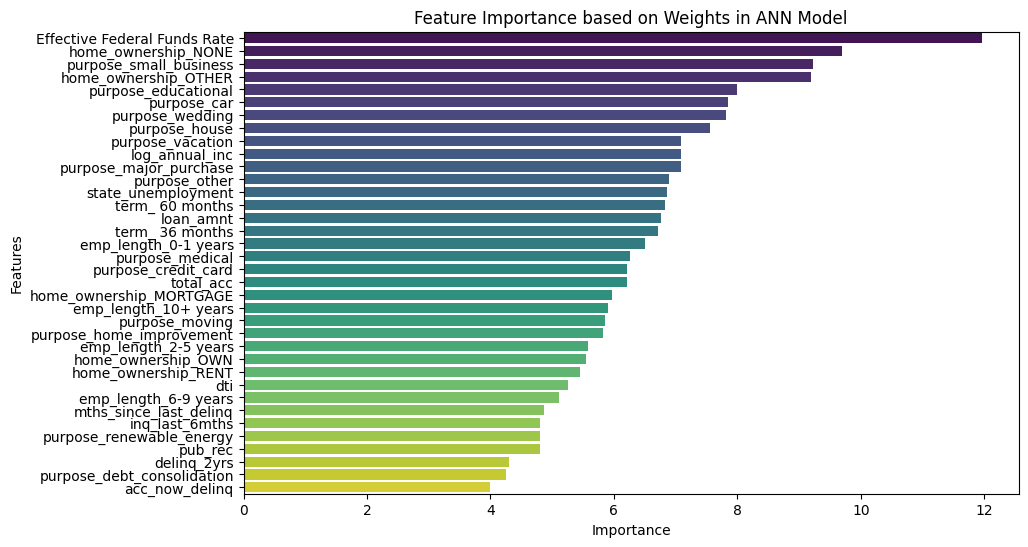

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract weights from the first layer
weights = model.layers[0].get_weights()[0]

# Calculate feature importance based on the absolute values of the weights
feature_importance = np.abs(weights).sum(axis=1)

# Create a DataFrame for better visualization
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance based on Weights in ANN Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Model Evaluation

After training, the model is evaluated on the test set. We'll predict classes, generate a classification report, and plot a confusion matrix for performance visualization.


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

1612/1612 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7884 - loss: 0.1551
Test accuracy: 0.7866397500038147


In [9]:
# Predict class probabilities and convert them to class labels
y_pred_prob = model.predict(X_test)

1612/1612 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


Accuracy: 0.63 

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.63      0.73     40423
         1.0       0.32      0.64      0.43     11133

    accuracy                           0.63     51556
   macro avg       0.59      0.64      0.58     51556
weighted avg       0.75      0.63      0.66     51556



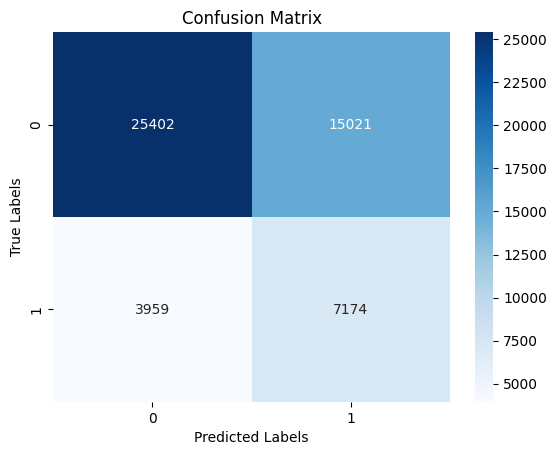

In [10]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

threshold = 0.2
y_pred = (y_pred_prob >= threshold).astype(int) 

# Generating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}', "\n")
print("Classification Report:\n", class_report)

# Plotting heatmap for confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=True,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Hyperparameter Tuning

In [11]:
# Define the range of thresholds between 0.2 and 0.3
thresholds = np.arange(0.2, 0.31, 0.01)  # Thresholds from 0.2 to 0.3 in steps of 0.01
confusion_matrices = []
f1_scores = []

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append((threshold, cm))
    
    # Calculate F1 score for the current threshold
    f1 = f1_score(y_test, y_pred)
    f1_scores.append((threshold, f1))
    
# Identify the threshold with the highest F1 score
best_threshold, best_f1 = max(f1_scores, key=lambda x: x[1])

# Print the confusion matrices and F1 scores for each threshold
for threshold, cm in confusion_matrices:
    print(f"Threshold: {threshold:.2f}\nConfusion Matrix:\n{cm}\n")

print(f"Best Threshold: {best_threshold:.2f} with F1 Score: {best_f1:.2f}")

Threshold: 0.20
Confusion Matrix:
[[25402 15021]
 [ 3959  7174]]

Threshold: 0.21
Confusion Matrix:
[[26476 13947]
 [ 4242  6891]]

Threshold: 0.22
Confusion Matrix:
[[27556 12867]
 [ 4521  6612]]

Threshold: 0.23
Confusion Matrix:
[[28576 11847]
 [ 4843  6290]]

Threshold: 0.24
Confusion Matrix:
[[29601 10822]
 [ 5180  5953]]

Threshold: 0.25
Confusion Matrix:
[[30349 10074]
 [ 5437  5696]]

Threshold: 0.26
Confusion Matrix:
[[31121  9302]
 [ 5731  5402]]

Threshold: 0.27
Confusion Matrix:
[[31910  8513]
 [ 5999  5134]]

Threshold: 0.28
Confusion Matrix:
[[32697  7726]
 [ 6322  4811]]

Threshold: 0.29
Confusion Matrix:
[[33468  6955]
 [ 6664  4469]]

Threshold: 0.30
Confusion Matrix:
[[34192  6231]
 [ 6967  4166]]

Best Threshold: 0.22 with F1 Score: 0.43


1612/1612 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Maximum TN/FN Ratio: 23.88 at Threshold: 0.02


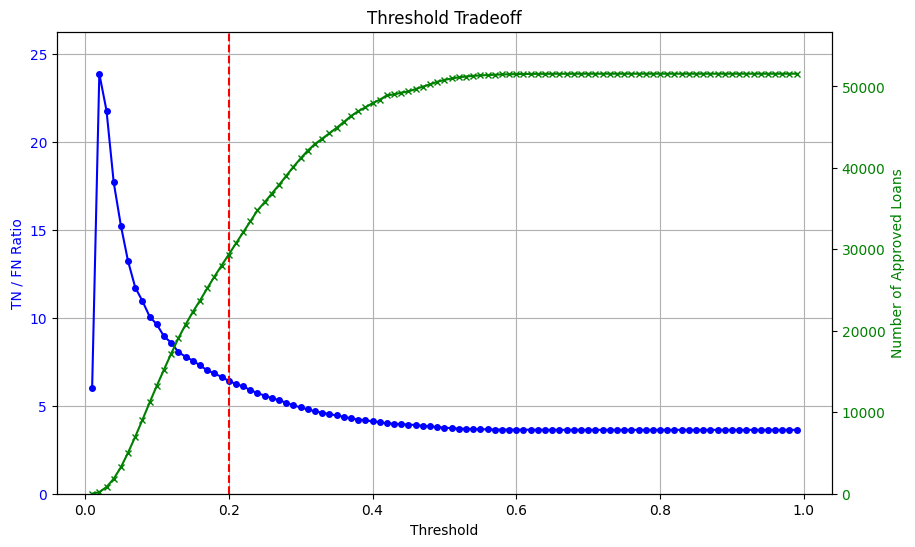

In [12]:
# Plotting True Negatives (TN) / False Negatives (FN) and number of approved loans against the threshold,

y_pred_prob = model.predict(X_test)

ratios = []
approved_loans = []
thresholds = np.arange(0.01, 1.00, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    TN = np.sum((y_pred.flatten() == 0) & (y_test.values == 0))
    FN = np.sum((y_pred.flatten() == 0) & (y_test.values == 1))
    
    if FN > 0:
        ratio = TN / FN
    else:
        ratio = np.nan 

    ratios.append(ratio)
    approved_loans.append(TN + FN)

# Filter out infinite and NaN ratios
valid_ratios = [(ratio, threshold) for ratio, threshold in zip(ratios, thresholds) if pd.notna(ratio) and ratio != np.inf]

# Find the maximum ratio and its corresponding threshold
if valid_ratios:
    max_ratio, best_threshold = max(valid_ratios, key=lambda x: x[0])

    # Print the threshold that gives the maximum ratio
    print(f'Maximum TN/FN Ratio: {max_ratio:.2f} at Threshold: {best_threshold:.2f}')
else:
    print("No valid ratios found.")

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the TN/FN ratio on the primary y-axis
ax1.plot(thresholds, ratios, marker='o', markersize=4, color='b', label='TN / FN Ratio')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('TN / FN Ratio', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

# Create a secondary y-axis to plot the number of approved loans
ax2 = ax1.twinx()
ax2.plot(thresholds, approved_loans, marker='x', markersize=4, color='g', label='Number of Approved Loans')
ax2.set_ylabel('Number of Approved Loans', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Set limits for the y-axes
try:
    max_ratio_limit = max(filter(lambda x: x != np.inf, ratios), default=0)
    ax1.set_ylim(0, max_ratio_limit * 1.1)

    max_approved_loans_limit = max(approved_loans, default=0)
    ax2.set_ylim(0, max_approved_loans_limit * 1.1)
except ValueError:
    pass

# Plotting a vertical line at threshold = 0.2
ax1.axvline(x=0.2, color='r', linestyle='--', label='Threshold = 0.2')

plt.title('Threshold Tradeoff')

plt.show()
